In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
import warnings
warnings.filterwarnings('ignore') 

In [10]:
np.random.seed(42)
time = pd.date_range(start='2018-01-01', periods=60, freq='M')
sales = 100 + np.arange(60)*2 + 10*np.sin(np.linspace(0, 3*np.pi, 60)) + np.random.normal(0, 5, 60)

df = pd.DataFrame({'Month': time, 'Sales': sales})
df.set_index('Month', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-31 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


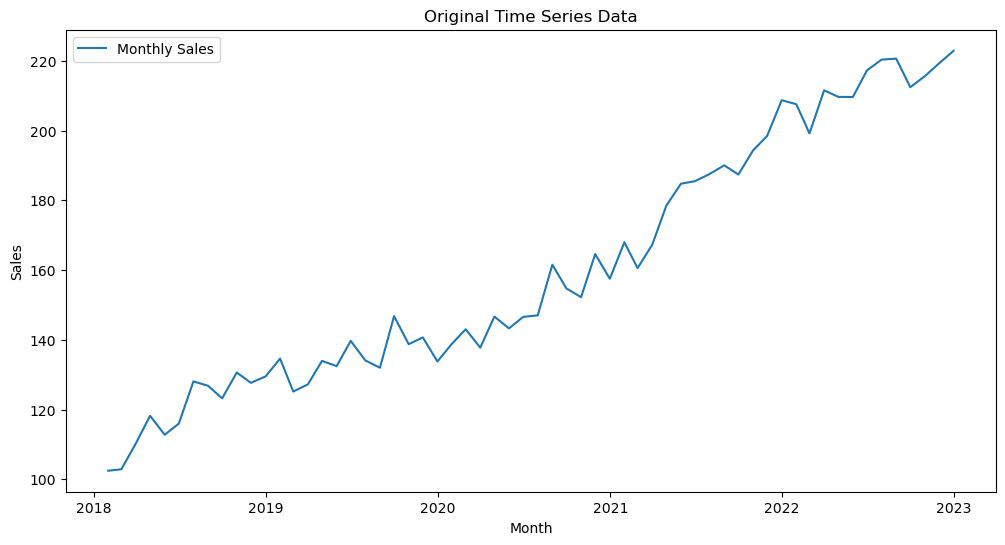

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df['Sales'], label='Monthly Sales')
plt.title('Original Time Series Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [13]:
result = adfuller(df['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
     print("data is Non-Stationary, differencing ")
else:
    print("data is Stationary")


ADF Statistic: 0.08808508485973714
p-value: 0.965238129202446
data is Non-Stationary, differencing 


In [14]:
df['Sales_diff'] = df['Sales'] - df['Sales'].shift(1)

In [15]:
df

,Sales,Sales_diff
Month,,
2018-01-31,102.483571,NaN
2018-02-28,102.899313,0.415743
2018-03-31,110.379210,7.479896
2018-04-30,118.226074,7.846864
2018-05-31,112.792907,-5.433168
2018-06-30,115.993883,3.200976
2018-07-31,128.079092,12.085209
2018-08-31,126.830295,-1.248797
2018-09-30,123.226848,-3.603446


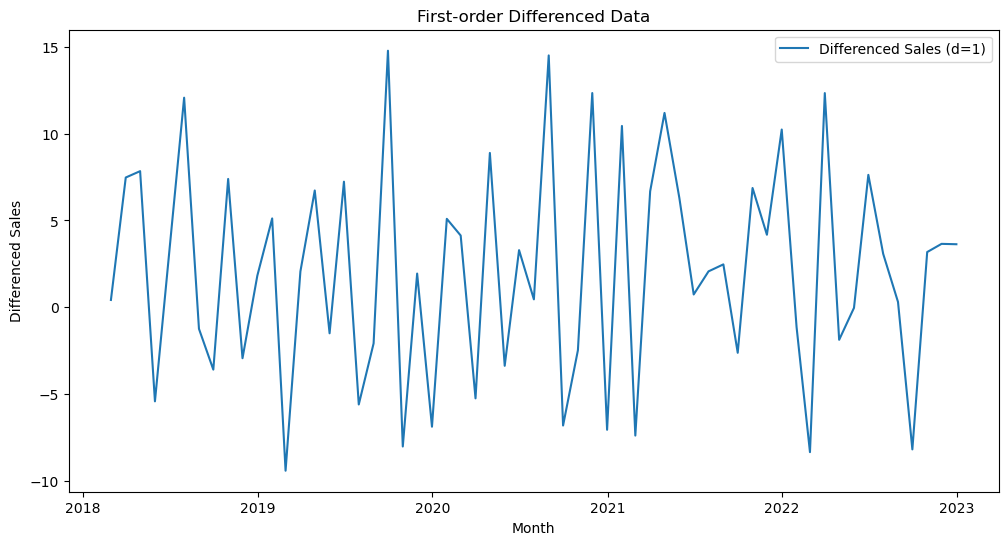

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['Sales_diff'], label='Differenced Sales (d=1)')
plt.title('First-order Differenced Data')
plt.xlabel('Month')
plt.ylabel('Differenced Sales')
plt.legend()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(df['Sales_diff'].dropna())

print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic (Differenced): -8.640288857101094
p-value (Differenced): 5.449304627967354e-14


In [18]:
df['Sales_diff2'] = df['Sales_diff'] - df['Sales_diff'].shift(1)

In [19]:
df

,Sales,Sales_diff,Sales_diff2
Month,,,
2018-01-31,102.483571,NaN,NaN
2018-02-28,102.899313,0.415743,NaN
2018-03-31,110.379210,7.479896,7.064154
2018-04-30,118.226074,7.846864,0.366968
2018-05-31,112.792907,-5.433168,-13.280032
2018-06-30,115.993883,3.200976,8.634143
2018-07-31,128.079092,12.085209,8.884233
2018-08-31,126.830295,-1.248797,-13.334006
2018-09-30,123.226848,-3.603446,-2.354650


In [20]:
#Step 1: ACF (Autocorrelation Function)   for decide q
#Step 2: PACF (Partial Autocorrelation Function)   for decide p

Text(0.5, 1.0, 'ACF Plot for-- q ')

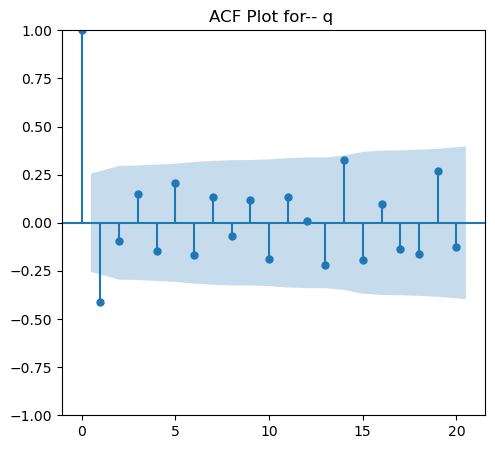

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(df['Sales_diff'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF Plot for-- q ')

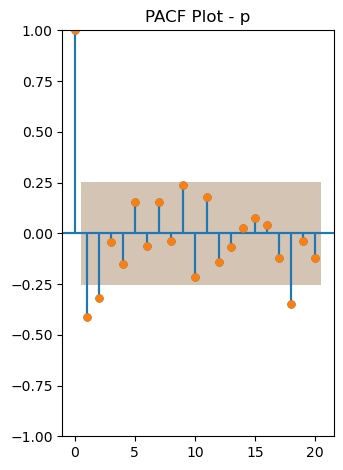

In [22]:
plt.subplot(1,2,2)
plot_pacf(df['Sales_diff'].dropna(), lags=20, ax=plt.gca(), method='ywm')
plt.title('PACF Plot - p')
plt.subplot(1,2,2)
plot_pacf(df['Sales_diff'].dropna(), lags=20, ax=plt.gca(), method='ywm')
plt.title('PACF Plot - p')
plt.tight_layout()
plt.show()

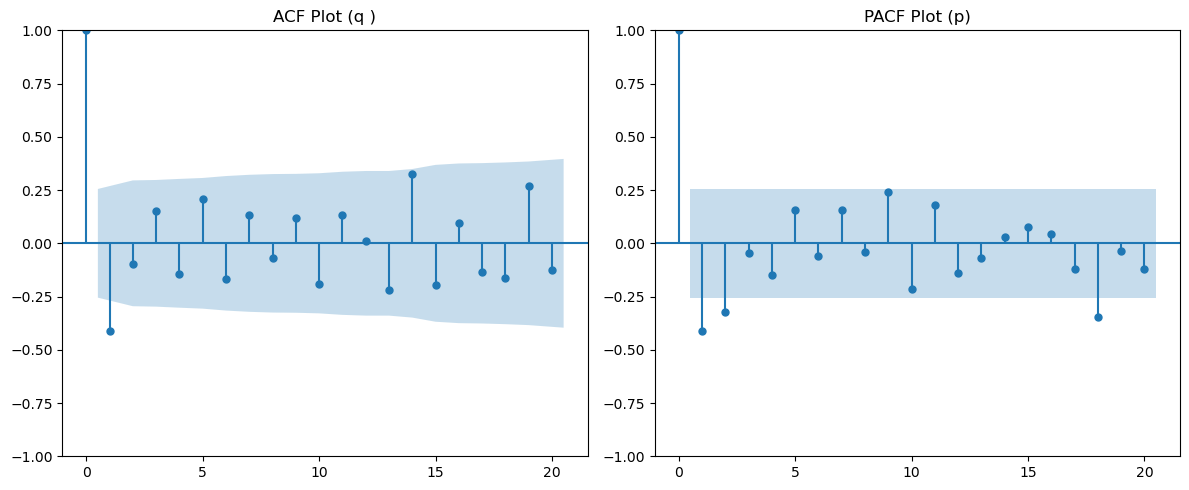

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(df['Sales_diff'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF Plot (q )')

plt.subplot(1,2,2)
plot_pacf(df['Sales_diff'].dropna(), lags=20, ax=plt.gca(), method='ywm')
plt.title('PACF Plot (p)')

plt.tight_layout()
plt.show()

In [ ]:
#Step 1: ARIMA Model Define

In [24]:
model = ARIMA(df['Sales'], order=(1,1,1))

In [25]:
model_fit = model.fit()

In [26]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -192.654
Date:                Mon, 21 Jul 2025   AIC                            391.308
Time:                        20:31:05   BIC                            397.541
Sample:                    01-31-2018   HQIC                           393.741
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1721      0.555     -0.310      0.756      -1.259       0.915
ma.L1         -0.1166      0.542     -0.215      0.830      -1.179       0.946
sigma2        40.0918      8.242      4.865      0.0

In [27]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

In [28]:
forecast

2023-01-31    221.697875
2023-02-28    221.900938
2023-03-31    221.865989
2023-04-30    221.872004
2023-05-31    221.870969
2023-06-30    221.871147
2023-07-31    221.871117
2023-08-31    221.871122
2023-09-30    221.871121
2023-10-31    221.871121
2023-11-30    221.871121
2023-12-31    221.871121
Freq: M, Name: predicted_mean, dtype: float64

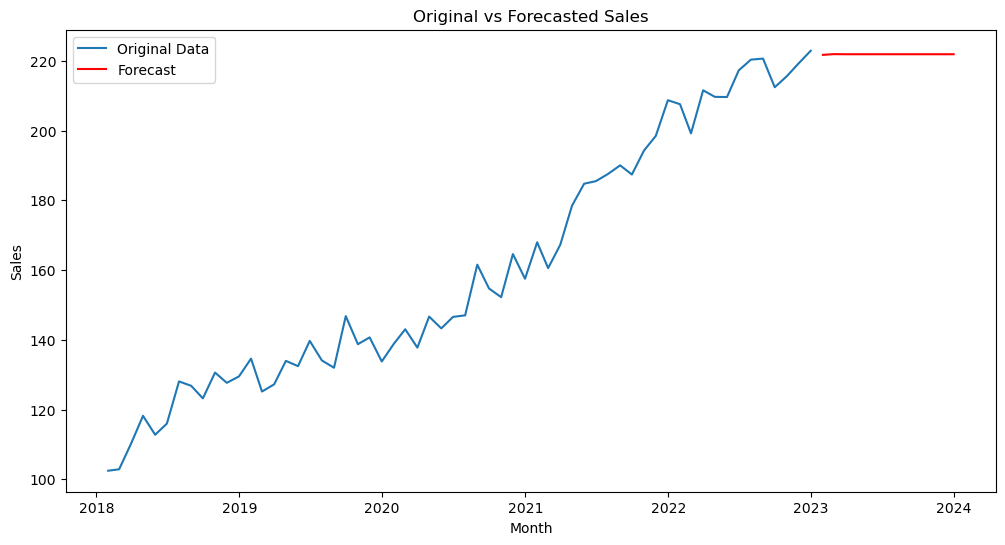

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df['Sales'], label='Original Data')
plt.plot(
    pd.date_range(start=df.index[-1]+pd.DateOffset(1), periods=forecast_steps, freq='M'),
    forecast,
    label='Forecast',
    color='red'
)
plt.title('Original vs Forecasted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

### SARIMA

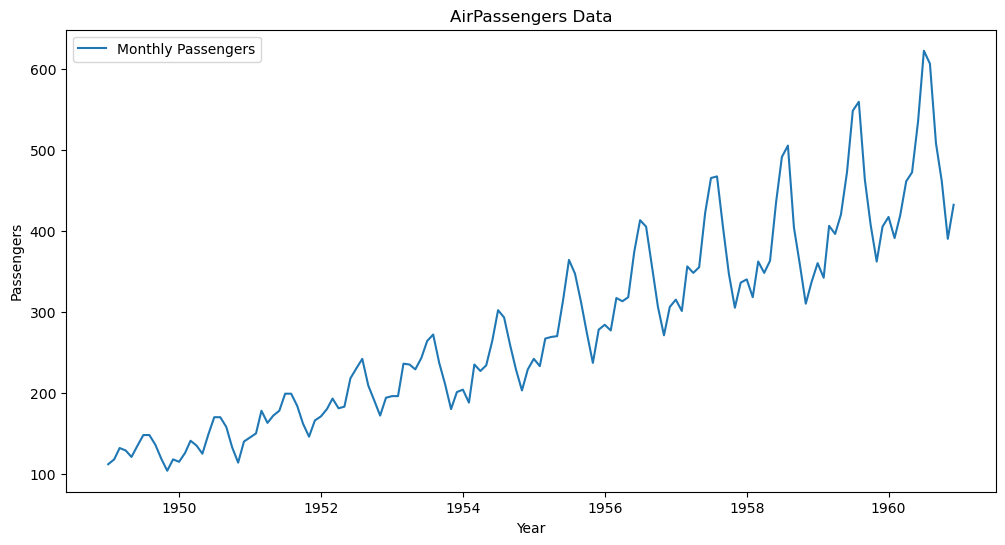

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# AirPassengers dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.figure(figsize=(12,6))
plt.plot(df, label='Monthly Passengers')
plt.title('AirPassengers Data')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()


In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411


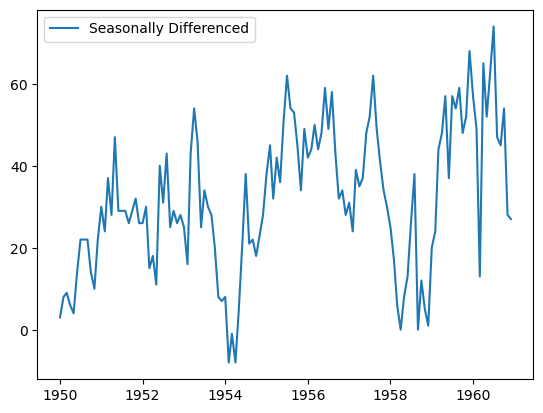

In [32]:
df['Passengers_diff'] = df['Passengers'] - df['Passengers'].shift(12)
plt.plot(df['Passengers_diff'], label='Seasonally Differenced')
plt.legend()
plt.show()

In [33]:
df

,Passengers,Passengers_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


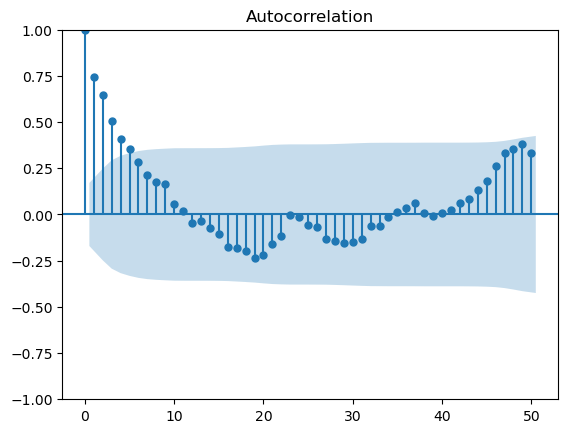

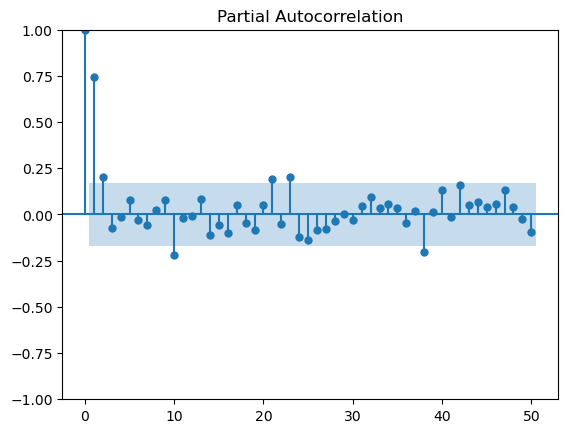

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Passengers_diff'].dropna(), lags=50)
plot_pacf(df['Passengers_diff'].dropna(), lags=50)
plt.show()

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA(p,d,q)(P,D,Q,s)
model = SARIMAX(df['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Mon, 21 Jul 2025   AIC                           1022.299
Time:                                    20:42:21   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

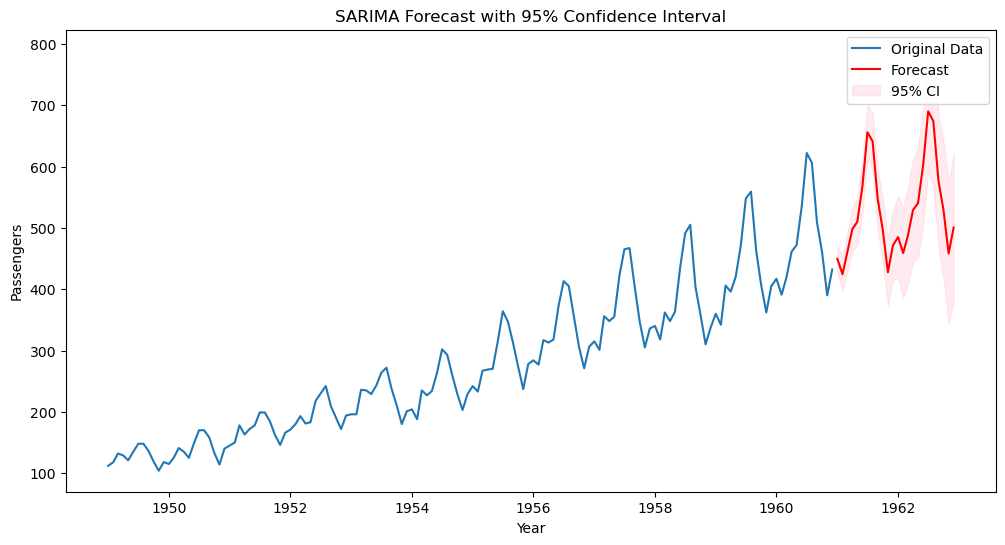

In [36]:
forecast_steps = 24
forecast_res = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_res.predicted_mean
forecast_ci = forecast_res.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3, label='95% CI')
plt.title('SARIMA Forecast with 95% Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()
